# Example plotting script for COMBLE-MIP analysis

In [27]:
%run functions_plotting.py

## select simulations to plot
sim_keyword = '100m'

In [28]:
## load ERA5 fields
era5_1d, era5_2d = load_era5(PATH='../../data_files/')

## load radiosondes
rs_dat = load_rs(PATH='../../data_files/',t_filter = 6.)

## load MAC-LWP
maclwp_dat = load_maclwp(PATH='../../data_files/',t_filter = 0.)

## load MODIS and VIIRS retrievals
modis_dat = load_modis(PATH='../../data_files/',t_filter = 0.)
viirs_dat = load_viirs(PATH='../../data_files/',t_filter = 0.)

../../data_files/theta_temp_rh_sh_uvw_sst_along_trajectory_era5ml_28h_end_2020-03-13-18.nc
../../data_files/anxsondewnpnM1.b1.20200313.232200.cdf
../../data_files/anxsondewnpnM1.b1.20200313.172600.cdf
../../data_files/anxsondewnpnM1.b1.20200313.112600.cdf
../../data_files/anxsondewnpnM1.b1.20200313.052700.cdf


In [6]:
## load all simulations located in subfolders of the given directory
var_vec_1d = ['hfss','hfls','ts'] # variables with ERA5 (longer time axis)
var_vec_2d = ['theta','qv','ua','va']
df_col_1d,df_col_2d = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword)

../../output_les/dharma/sandbox/Lx25km_dx100m/DHARMA_LES_COMBLE-I.nc
../../output_les/dharma/sandbox/Lx25km_dx100m_progNa/DHARMA_LES_COMBLE-I.nc
../../output_les/wrf/sandbox/Lx25km_dx100m/WRF_LES_COMBLE-I_Lx25km_dx100m.nc
../../output_les/dharma/sandbox/Lx25km_dx100m/DHARMA_LES_COMBLE-I.nc
../../output_les/dharma/sandbox/Lx25km_dx100m_progNa/DHARMA_LES_COMBLE-I.nc
../../output_les/wrf/sandbox/Lx25km_dx100m/WRF_LES_COMBLE-I_Lx25km_dx100m.nc


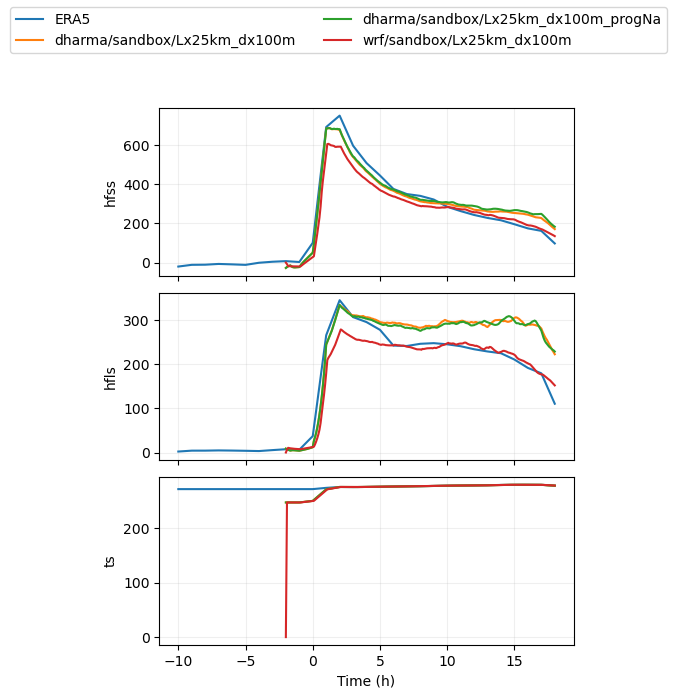

In [7]:
## plot variables that have only time dependence
plot_1d(pd.concat([df_col_1d,era5_1d]),var_vec_1d)

In [29]:
## load all simulations located in subfolders of the given directory
var_vec_1d = ['cwp','rwp','iwp','swp','gwp','cod','zi'] # variables without ERA5 (shorter time axis)
var_vec_2d = ['theta','qv','ua','va']
df_col_1d,df_col_2d = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword)

../../output_les/dharma/sandbox/Lx25km_dx100m/DHARMA_LES_COMBLE-I.nc
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: DHARMA LES results for COMBLE-MIP case: fixed Nd and Ni
    reference: https://github.com/ARM-Development/comble-mip
    authors: Ann Fridlind (ann.fridlind@nasa.gov) and Florian Tornow (florian.tornow@nasa.gov)
    source: /data/home/fridlind/dharma/sandbox/case0313_diagn_ice25_miz_cfmip_dx100/10-20h/dharma.scalars.cdf
    version: 2023-07-07 22:25:35
    format_version: DEPHY SCM format version 1.6
    script: convert_DHARMA_LES_output_to_dephy_format.ipynb
    startDate: 2020-03-12T22:00:00Z
    force_geo: 1
    surfaceType: ocean (after spin-up)
    surfaceForcing: ts (after spin-up)
    lat: 73.0 deg N
    dx: 100.0 m
    dy: 100.0 m
    dz: see zf variable
    nx: 256
    ny: 256
    nz: 159
    dimensions(sizes): zf(159), time(241)
    variables(dimensions): float64 zf(zf), float64 time(time), float64 pa(

Computing Liquid Water Path


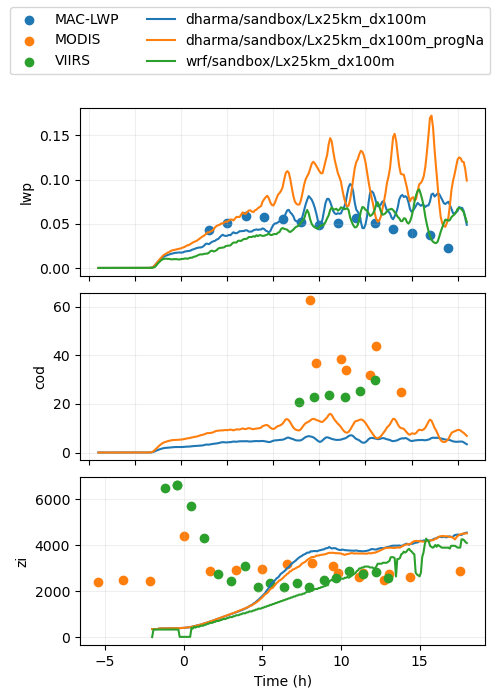

In [30]:
## plot variables that have only time dependence
plot_1d(pd.concat([df_col_1d,maclwp_dat,modis_dat,viirs_dat]),['lwp','cod','zi'])

Computing wind speed
Computing wind direction


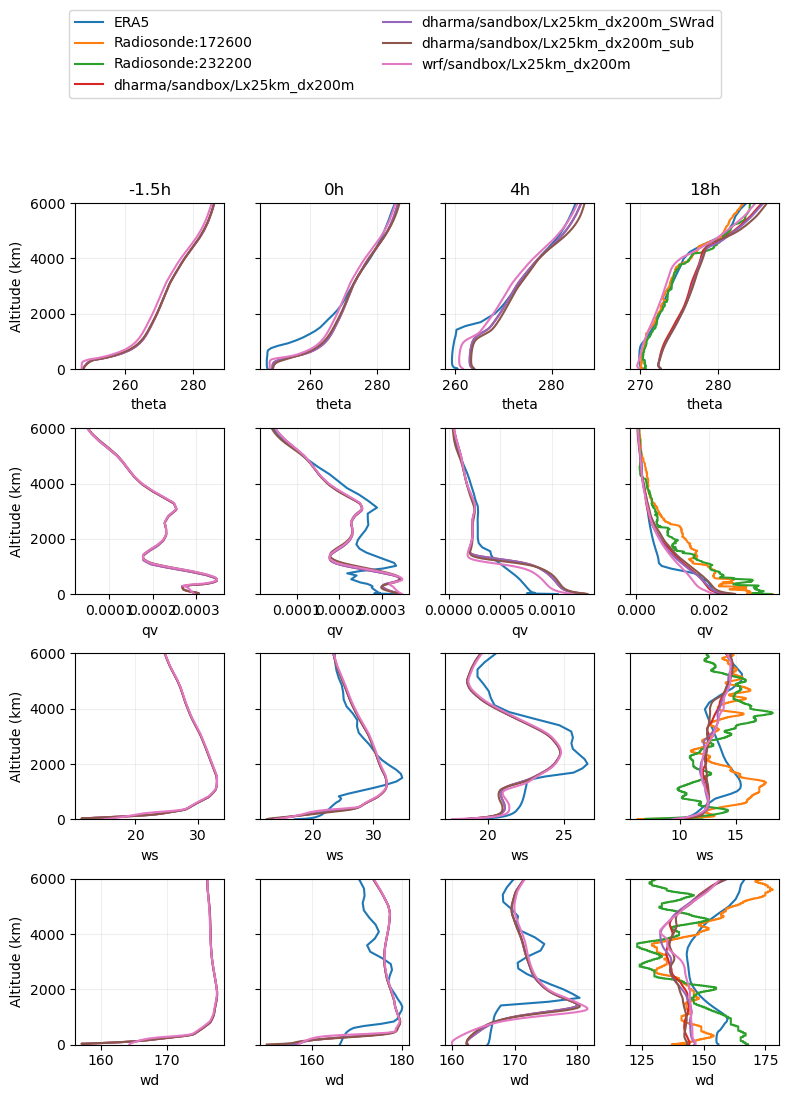

<Figure size 1000x600 with 0 Axes>

In [7]:
## plot all variables that have time and height dependence
#plot_2d(df_col_2d,var_vec_2d,[0,3,6,9,12,15,18],z_max=6000)

## example where ERA5 and radiosonde are included
plot_2d(pd.concat([df_col_2d,era5_2d,rs_dat]),var_vec = ['theta','qv','ws','wd'],times=[-1.5,0,4,18],z_max=6000)